# Logistic Regression

## References


* http://www.cs.cmu.edu/~tom/mlbook/NBayesLogReg.pdf
* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* http://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf



In [24]:
import matplotlib.pylab as plt
from matplotlib import colors
from matplotlib import pylab
import numpy as np
import scipy.optimize as opt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
def lf(s):
    return 1/(1+np.exp(s))

def probFalse(s):
    return lf(s)

def probTrue(s):
    return 1-lf(s)

def predict(s):
    return s > 0

In [3]:
w=10
b=0
np.log(1/(1+np.exp(-w))) + np.log(np.exp(w)/(1+np.exp(w)))

-9.079779843364126e-05

In [4]:
def cll(X, y, w, b):
    c_ = 0
    for i in range(X.shape[0]):
        s = np.dot(X[i], w).sum() + b
        if y[i]:
            c_ += np.log(probTrue(s))
        else:
            c_ += np.log(probFalse(s))
    return c_

In [5]:
X = np.matrix([[-1], [2]])
y = [0, 1]

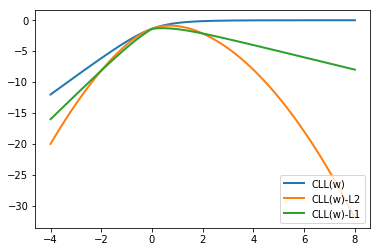

In [6]:
ws = np.linspace(-4, 8, 1000)
C = 1
_, ax = plt.subplots()
ax.plot(ws, [C*cll(X, y, [w], 0) for w in ws], linewidth=2, label='CLL(w)')
ax.plot(ws, [C*cll(X, y, [w], 0) - 0.5*w*w for w in ws], linewidth=2, label='CLL(w)-L2')
ax.plot(ws, [C*cll(X, y, [w], 0) - np.abs(w) for w in ws], linewidth=2, label='CLL(w)-L1')
ax.legend(loc=4)

In [7]:
ws[np.argmax([C*cll(X, y, [w], 0) for w in ws])]

8.0

In [8]:
ws[np.argmax([C*cll(X, y, [w], 0) - 0.5*w*w for w in ws])]

0.7207207207207205

In [9]:
ws[np.argmax([C*cll(X, y, [w], 0) - np.abs(w) for w in ws])]

0.42042042042042027

In [10]:
lr = LogisticRegression(penalty='l2', solver='liblinear', C = C)
lr.fit(X, y)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
print(lr.intercept_)
print(lr.coef_)

[-0.09876038]
[[0.72034182]]


In [12]:
lr.predict_proba(X)

array([[0.69404573, 0.30595427],
       [0.20719396, 0.79280604]])

## Single Feature

In [13]:
#N = 20
#x1 = np.random.normal(3, 2, N)
x1 = np.arange(-3, 10)
X = x1.reshape(-1, 1)
N = X.shape[0]

In [14]:
np.mean(X)

3.0

In [15]:
b = -6
w = [2]

In [16]:
df = (w*X).sum(axis=1) + b

In [17]:
np.mean(df)

0.0

In [18]:
pf = lf(df)
# Deterministic y
y = pf<0.5

(array([5., 1., 0., 0., 0., 1., 0., 0., 1., 5.]),
 array([6.14417460e-06, 1.00004915e-01, 2.00003687e-01, 3.00002458e-01,
        4.00001229e-01, 5.00000000e-01, 5.99998771e-01, 6.99997542e-01,
        7.99996313e-01, 8.99995085e-01, 9.99993856e-01]),
 <a list of 10 Patch objects>)

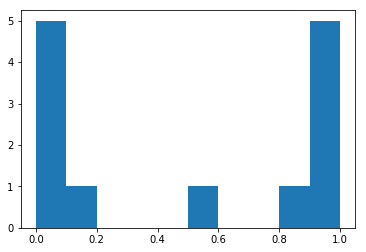

In [19]:
plt.hist(pf)

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

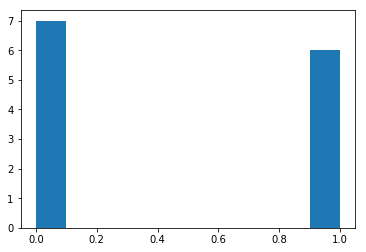

In [20]:
plt.hist(y)

In [21]:
ny0 = np.sum(y==0)
ny1 = X.shape[0] - ny0

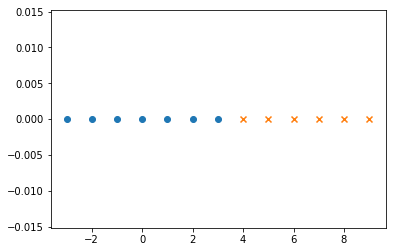

In [22]:
plt.scatter(X[y==0, 0], np.zeros(ny0), marker='o')
plt.scatter(X[y==1, 0], np.zeros(ny1), marker='x')

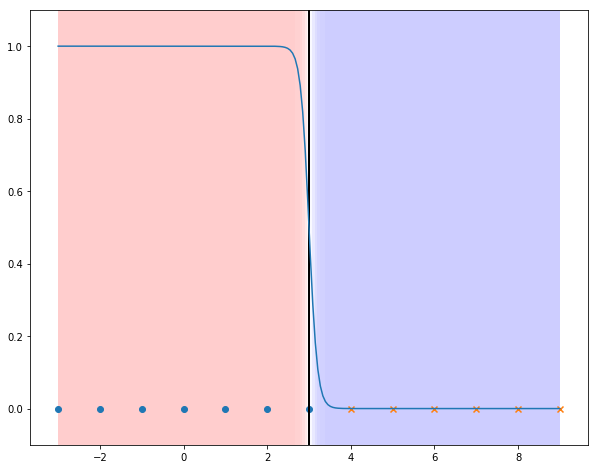

In [27]:
# Meshgrig for one feature data
nx = ny = 200
x_min = np.min(X, axis=0)[0]
x_max = np.max(X, axis=0)[0]
y_min = -0.1
y_max = 1.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
D=np.c_[xx.ravel(), yy.ravel()]



m = np.mean(X)
w0 = 10
b = -(w0*m)
w=[w0]

df = (w*D[:, 0]) + b
pf = lf(df)

data = D[:, 0]
inds = np.argsort(data)
plt.plot(data[inds], pf[inds])

pf = pf-0.5

p=pf.reshape(xx.shape)


plt.pcolormesh(xx, yy, p, cmap='seismic', norm=colors.Normalize(-5, 5))
plt.contour(xx, yy, p, [0], linewidths=2., colors='k')
plt.scatter(X[y==0, 0], np.zeros(ny0), marker='o')
plt.scatter(X[y==1, 0], np.zeros(ny1), marker='x')

## Two Features

In [28]:
x1 = np.arange(-3, 10)
x2 = np.arange(-3, 10)
X = np.hstack((x1.reshape(-1, 1), x2.reshape(-1, 1)))
N = X.shape[0]

In [29]:
np.mean(X,axis=0)

array([3., 3.])

In [30]:
b = -3
w = [-2, 3]

df = (w*X).sum(axis=1) + b

In [31]:
np.mean(df)

0.0

In [32]:
pf = lf(df)

y = pf < 0.5

In [41]:
lr = LogisticRegression(solver='liblinear', C=100, penalty='l1')
lr.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
print(lr.intercept_)
print(lr.coef_[0])

[-21.00943357]
[3.01145674 3.02529857]


In [43]:
lr.score(X, y)

1.0

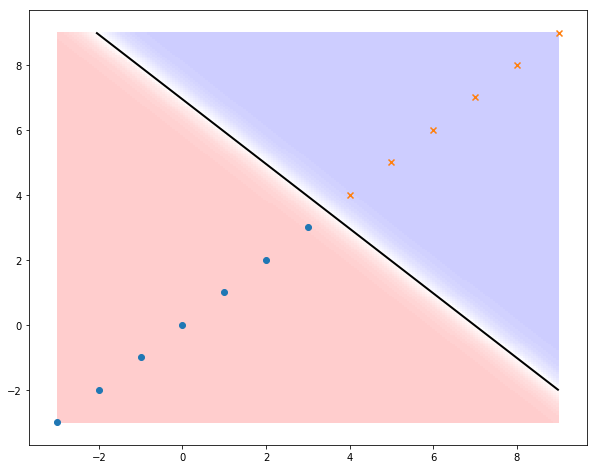

In [44]:
# For two features

nx = ny = 200
x_min = np.min(X, axis=0)[0]
x_max = np.max(X, axis=0)[0]
y_min = np.min(X, axis=0)[1]
y_max = np.max(X, axis=0)[1]
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
D=np.c_[xx.ravel(), yy.ravel()]
p=np.array([lr.predict_proba([d])[0][0] for d in D])
p = p-0.5
p=p.reshape(xx.shape)
plt.pcolormesh(xx, yy, p, cmap='seismic', norm=colors.Normalize(-5, 5))
plt.contour(xx, yy, p, [0], linewidths=2., colors='k')
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], marker='x')

In [45]:
lr.intercept_ = b
lr.coef_[0] = np.asarray(w)

In [46]:
lr.score(X, y)

1.0

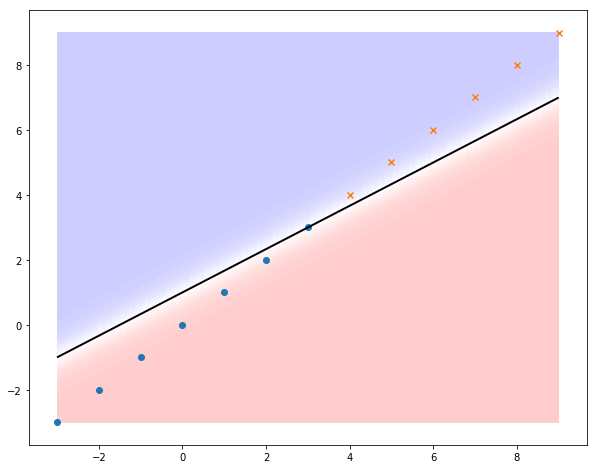

In [47]:
# For two features

nx = ny = 200
x_min = np.min(X, axis=0)[0]
x_max = np.max(X, axis=0)[0]
y_min = np.min(X, axis=0)[1]
y_max = np.max(X, axis=0)[1]
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
D=np.c_[xx.ravel(), yy.ravel()]
p=np.array([lr.predict_proba([d])[0][0] for d in D])
p = p-0.5
p=p.reshape(xx.shape)
plt.pcolormesh(xx, yy, p, cmap='seismic', norm=colors.Normalize(-5, 5))
plt.contour(xx, yy, p, [0], linewidths=2., colors='k')
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o')
plt.scatter(X[y==1, 0], X[y==1, 1], marker='x')

## Regularization

__Question (exercise):__ Assume that there are two features that are identical. Under what conditions Would their weights be identical
* a) no regularization? 
* b) L2? 
* c) L1? 

In [48]:
from sklearn.datasets import load_breast_cancer

In [49]:
X, y = load_breast_cancer(return_X_y=True)

In [50]:
from sklearn.model_selection import train_test_split
import math

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=1/3)

In [52]:
X_train.shape

(379, 30)

In [53]:
X_test.shape

(190, 30)

In [54]:
train_clls = []
test_clls = []
for p in np.arange(-5, 5):
    c = math.pow(10, p)
    lr = LogisticRegression(solver='liblinear', penalty='l2', C=c)
    lr.fit(X_train, y_train)
    train_clls.append(cll(X_train, y_train, lr.coef_[0], lr.intercept_)/X_train.shape[0])
    test_clls.append(cll(X_test, y_test, lr.coef_[0], lr.intercept_)/X_test.shape[0])

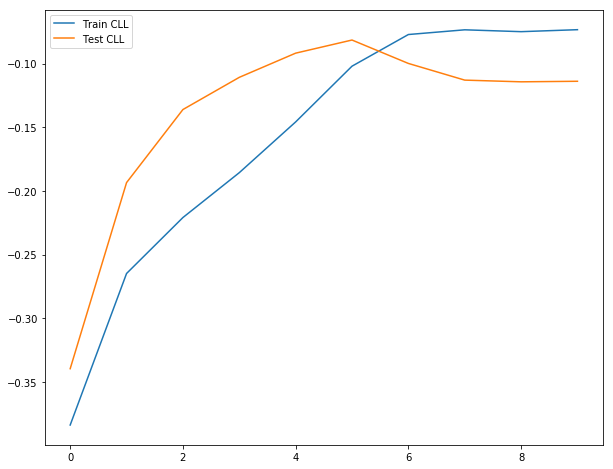

In [55]:
plt.plot(train_clls, label='Train CLL')
plt.plot(test_clls, label='Test CLL')
plt.legend()

In [56]:
from sklearn.metrics import log_loss

In [57]:
train_lls = []
test_lls = []
for p in np.arange(-5, 5):
    c = math.pow(10, p)
    lr = LogisticRegression(solver='liblinear', penalty='l2', C=c)
    lr.fit(X_train, y_train)
    train_lls.append(log_loss(y_train, lr.predict_proba(X_train)))
    test_lls.append(log_loss(y_test, lr.predict_proba(X_test)))
    print(c)
    print(np.sum(lr.coef_[0]==0))
    print()

1e-05
0

0.0001
0

0.001
0

0.01
0

0.1
0

1.0
0

10.0
0

100.0
0

1000.0
0

10000.0
0



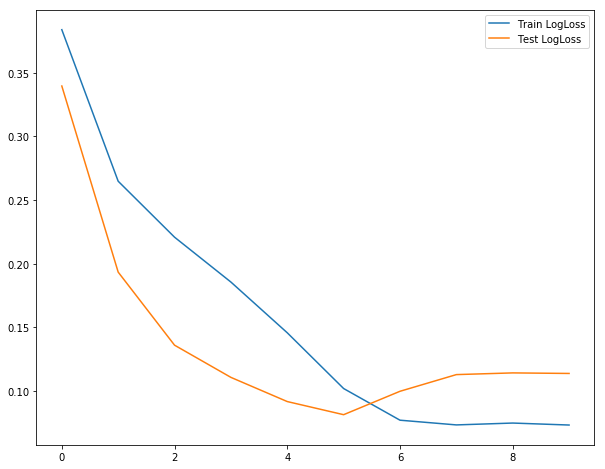

In [58]:
plt.plot(train_lls, label='Train LogLoss')
plt.plot(test_lls, label='Test LogLoss')
plt.legend()

In [59]:
# You probably should not do this!
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

In [60]:
train_lls = []
test_lls = []
for p in np.arange(-5, 5):
    c = math.pow(10, p)
    lr = LogisticRegression(solver='liblinear', penalty='l1', C=c)
    lr.fit(X_train, y_train)
    train_lls.append(log_loss(y_train, lr.predict_proba(X_train)))
    test_lls.append(log_loss(y_test, lr.predict_proba(X_test)))
    print(c)
    print(np.sum(lr.coef_[0]==0))
    print()

1e-05
30

0.0001
29

0.001
27

0.01
26

0.1
23

1.0
20

10.0
18

100.0
10

1000.0
2

10000.0
0



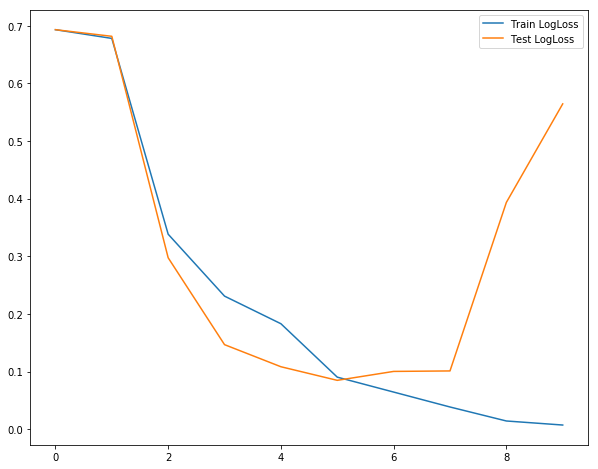

In [61]:
plt.plot(train_lls, label='Train LogLoss')
plt.plot(test_lls, label='Test LogLoss')
plt.legend()

## IMDB

In [62]:
import codecs
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pylab as plt
from IPython.core import display
import re

In [63]:
with open("data/imdb.pickle.z", 'rb') as f:
    compressed_data = f.read()

uncompressed_data = codecs.decode(compressed_data, 'zlib_codec')
imdb_data = pickle.loads(uncompressed_data)

In [64]:
tp = r"(?u)\b[\w\'/]+\b"
vect = CountVectorizer(token_pattern=tp, lowercase=True, ngram_range=(1, 1), min_df=10, max_df=0.7, binary=True)

In [65]:
X_train = vect.fit_transform(imdb_data['train_corpus'])

In [66]:
X_train.shape

(25000, 18948)

In [67]:
feature_names = np.asarray(vect.get_feature_names())

In [68]:
X_test = vect.transform(imdb_data['test_corpus'])

In [69]:
y_train = imdb_data['y_train']
y_test = imdb_data['y_test']

In [70]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [71]:
bn = BernoulliNB()
mnb = MultinomialNB()
lrl2 = LogisticRegression(solver='liblinear', penalty='l2')
lrl1 = LogisticRegression(solver='liblinear', penalty='l1')
clfs = [bn, mnb, lrl2, lrl1]

In [72]:
for clf in clfs:
    clf.fit(X_train, y_train)
    print(clf)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    print()

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.88056
0.8382

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.88232
0.83788

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
0.9964
0.87208

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
0.98124
0.87208



In [73]:
np.sum(lrl2.coef_[0] == 0)

0

In [76]:
np.sum(lrl1.coef_[0] == 0)

14393

In [77]:
w = lrl2.coef_[0]
inds = np.argsort(np.abs(w))[::-1]
for i in inds[:10]:
    print(feature_names[i], w[i])

7/10 3.3387928497949786
4/10 -2.8276824587312053
3/10 -2.3654374840886643
worst -2.345946543544235
waste -2.3232042042130434
disappointment -2.13819101425405
poorly -2.088487966786549
8/10 1.989110066293646
1/10 -1.8783738543010715
2/10 -1.7232939656567459


In [78]:
w = lrl1.coef_[0]
inds = np.argsort(np.abs(w))[::-1]
for i in inds[:10]:
    print(feature_names[i], w[i])

7/10 5.90363131309074
4/10 -5.657795869545481
wayans -4.85596088053583
3/10 -4.086799455041804
1/10 -3.5483559909532882
thunderbirds -3.5319414056866054
8/10 3.510934896218861
cafã 3.37804537384522
fez 3.3123653246813367
poisoning 3.2878247842163137


In [79]:
lrl1 = LogisticRegression(solver='liblinear', penalty='l1', C = 100)
lrl1.fit(X_train, y_train)
print(lrl1.score(X_train, y_train))
print(lrl1.score(X_test, y_test))

1.0
0.85244


In [80]:
np.sum(lrl1.coef_[0] == 0)

11655

In [81]:
w = lrl1.coef_[0]
inds = np.argsort(np.abs(w))[::-1]
for i in inds[:10]:
    print(feature_names[i], w[i])

moodiness 16.251108170815915
fez 15.880699384741819
7/10 15.213080919956013
wayans -14.393861828445667
4/10 -14.280491162904386
cafã 13.657924284642922
poisoning 13.221324436438296
3/10 -12.871806915800954
betsy -12.506221878245247
thunderbirds -11.955114902100153


In [82]:
lrl1 = LogisticRegression(solver='liblinear', penalty='l1', C = 0.1)
lrl1.fit(X_train, y_train)
print(lrl1.score(X_train, y_train))
print(lrl1.score(X_test, y_test))

0.89648
0.88032


In [83]:
np.sum(lrl1.coef_[0] == 0)

18023

In [84]:
w = lrl1.coef_[0]
inds = np.argsort(np.abs(w))[::-1]
for i in inds[:10]:
    print(feature_names[i], w[i])

7/10 2.3368929040416697
4/10 -2.2223518316520283
waste -1.5674134478979955
worst -1.5466411825070356
8/10 1.3255244362972844
3/10 -1.2827471488765334
poorly -1.246734852123148
awful -1.2410822755052888
disappointment -1.1214157363750137
dull -1.0597779659746143


In [85]:
lrl1 = LogisticRegression(solver='liblinear', penalty='l1', C = 0.01)
lrl1.fit(X_train, y_train)
print(lrl1.score(X_train, y_train))
print(lrl1.score(X_test, y_test))

0.81612
0.81176


In [86]:
np.sum(lrl1.coef_[0] == 0)

18808

In [87]:
w = lrl1.coef_[0]
inds = np.argsort(np.abs(w))[::-1]
for i in inds[:10]:
    print(feature_names[i], w[i])

worst -1.2887199286229307
waste -1.020574096410686
awful -0.8921904506608875
bad -0.7775186802439411
excellent 0.7743122042925867
great 0.6652375203197233
boring -0.649852949392215
poor -0.5698867272174744
perfect 0.5472907829331205
wonderful 0.5280530560870963


In [88]:
lrl1 = LogisticRegression(solver='liblinear', penalty='l1', C = 0.001)
lrl1.fit(X_train, y_train)
print(lrl1.score(X_train, y_train))
print(lrl1.score(X_test, y_test))

0.5932
0.5976


In [89]:
np.sum(lrl1.coef_[0] == 0)

18946

In [90]:
w = lrl1.coef_[0]
inds = np.argsort(np.abs(w))[::-1]
for i in inds[:10]:
    print(feature_names[i], w[i])

bad -0.3384873408158918
great 0.11718740804995677
familiarity 0.0
false 0.0
falsely 0.0
falters 0.0
fame 0.0
famed 0.0
familial 0.0
familiar 0.0
